# Setup code taken from Coursework_1

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

def train_model_and_plot_stats(
        model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, notebook=True):
    
    # As well as monitoring the error over training also monitor classification
    # accuracy i.e. proportion of most-probable predicted classes being equal to targets
    data_monitors={'acc': lambda y, t: (y.argmax(-1) == t.argmax(-1)).mean()}

    # Use the created objects to initialise a new Optimiser instance.
    optimiser = Optimiser(
        model, error, learning_rule, train_data, valid_data, data_monitors, notebook=notebook)

    # Run the optimiser for 5 epochs (full passes through the training set)
    # printing statistics every epoch.
    stats, keys, run_time = optimiser.train(num_epochs=num_epochs, stats_interval=stats_interval)

    # Plot the change in the validation and training set error over training.
    fig_1 = plt.figure(figsize=(8, 4))
    ax_1 = fig_1.add_subplot(111)
    for k in ['error(train)', 'error(valid)']:
        ax_1.plot(np.arange(1, stats.shape[0]) * stats_interval, 
                  stats[1:, keys[k]], label=k)
    ax_1.legend(loc=0)
    ax_1.set_xlabel('Epoch number')

    # Plot the change in the validation and training set accuracy over training.
    fig_2 = plt.figure(figsize=(8, 4))
    ax_2 = fig_2.add_subplot(111)
    for k in ['acc(train)', 'acc(valid)']:
        ax_2.plot(np.arange(1, stats.shape[0]) * stats_interval, 
                  stats[1:, keys[k]], label=k)
    ax_2.legend(loc=0)
    ax_2.set_xlabel('Epoch number')
    
    return stats, keys, run_time, fig_1, ax_1, fig_2, ax_2

In [2]:
# The below code will set up the data providers, random number
# generator and logger objects needed for training runs. As
# loading the data from file take a little while you generally
# will probably not want to reload the data providers on
# every training run. If you wish to reset their state you
# should instead use the .reset() method of the data providers.
import numpy as np
import logging
from mlp.data_providers import MNISTDataProvider, EMNISTDataProvider

# Seed a random number generator
seed = 11102018 
rng = np.random.RandomState(seed)
batch_size = 100
# Set up a logger object to print info about the training run to stdout
logger = logging.getLogger()
logger.setLevel(logging.INFO)
logger.handlers = [logging.StreamHandler()]

# Create data provider objects for the MNIST data set
train_data = EMNISTDataProvider('train', batch_size=batch_size, rng=rng)
valid_data = EMNISTDataProvider('valid', batch_size=batch_size, rng=rng)

KeysView(<numpy.lib.npyio.NpzFile object at 0x10b258dd8>)
KeysView(<numpy.lib.npyio.NpzFile object at 0x10b252a58>)


In [3]:
from mlp.layers import AffineLayer, SoftmaxLayer, SigmoidLayer, ReluLayer, LeakyReluLayer
from mlp.errors import CrossEntropySoftmaxError
from mlp.models import MultipleLayerModel
from mlp.initialisers import ConstantInit, GlorotUniformInit
from mlp.learning_rules import AdamLearningRule, GradientDescentLearningRule, RMSPropLearningRule
from mlp.optimisers import Optimiser

# Test the new RMSProp class

Epoch 1: 4.0s to complete
    error(train)=8.42e-01, acc(train)=7.55e-01, error(valid)=8.71e-01, acc(valid)=7.52e-01


Epoch 2: 4.6s to complete
    error(train)=8.12e-01, acc(train)=7.67e-01, error(valid)=8.77e-01, acc(valid)=7.56e-01


Epoch 3: 4.2s to complete
    error(train)=9.70e-01, acc(train)=7.44e-01, error(valid)=1.04e+00, acc(valid)=7.28e-01


Epoch 4: 4.0s to complete
    error(train)=1.03e+00, acc(train)=7.45e-01, error(valid)=1.15e+00, acc(valid)=7.29e-01


Epoch 5: 4.5s to complete
    error(train)=1.05e+00, acc(train)=7.53e-01, error(valid)=1.16e+00, acc(valid)=7.40e-01


Epoch 6: 3.7s to complete
    error(train)=1.32e+00, acc(train)=7.34e-01, error(valid)=1.49e+00, acc(valid)=7.17e-01


Epoch 7: 4.4s to complete
    error(train)=1.33e+00, acc(train)=7.45e-01, error(valid)=1.52e+00, acc(valid)=7.28e-01


Epoch 8: 4.7s to complete
    error(train)=1.36e+00, acc(train)=7.16e-01, error(valid)=1.50e+00, acc(valid)=7.03e-01


Epoch 9: 3.9s to complete
    error(train)=1.38e+00, acc(train)=7.33e-01, error(valid)=1.56e+00, acc(valid)=7.19e-01


Epoch 10: 4.1s to complete
    error(train)=1.47e+00, acc(train)=7.19e-01, error(valid)=1.65e+00, acc(valid)=7.04e-01


Epoch 11: 3.8s to complete
    error(train)=1.63e+00, acc(train)=7.18e-01, error(valid)=1.85e+00, acc(valid)=7.05e-01


Epoch 12: 3.9s to complete
    error(train)=1.52e+00, acc(train)=6.91e-01, error(valid)=1.72e+00, acc(valid)=6.79e-01


Epoch 13: 3.9s to complete
    error(train)=1.78e+00, acc(train)=7.09e-01, error(valid)=2.01e+00, acc(valid)=6.94e-01


Epoch 14: 3.3s to complete
    error(train)=1.47e+00, acc(train)=7.28e-01, error(valid)=1.69e+00, acc(valid)=7.10e-01


Epoch 15: 4.1s to complete
    error(train)=1.59e+00, acc(train)=6.95e-01, error(valid)=1.84e+00, acc(valid)=6.80e-01


Epoch 16: 4.4s to complete
    error(train)=1.78e+00, acc(train)=7.13e-01, error(valid)=2.08e+00, acc(valid)=6.96e-01


Epoch 17: 4.4s to complete
    error(train)=1.60e+00, acc(train)=7.19e-01, error(valid)=1.88e+00, acc(valid)=7.02e-01


Epoch 18: 4.4s to complete
    error(train)=1.83e+00, acc(train)=7.00e-01, error(valid)=2.18e+00, acc(valid)=6.81e-01


Epoch 19: 4.3s to complete
    error(train)=1.62e+00, acc(train)=7.24e-01, error(valid)=1.96e+00, acc(valid)=7.01e-01


Epoch 20: 4.0s to complete
    error(train)=1.69e+00, acc(train)=7.21e-01, error(valid)=2.01e+00, acc(valid)=7.01e-01


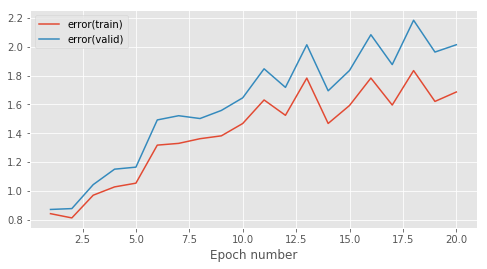

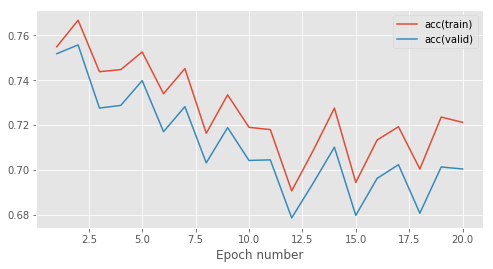

In [4]:
# The model set up code below is provided as a starting point.
# You will probably want to add further code cells for the
# different experiments you run.

#setup hyperparameters
learning_rate = 0.1
num_epochs = 20
stats_interval = 1
input_dim, output_dim, hidden_dim = 784, 47, 100

weights_init = GlorotUniformInit(rng=rng)
biases_init = ConstantInit(0.)
model = MultipleLayerModel([
    AffineLayer(input_dim, hidden_dim, weights_init, biases_init), 
    ReluLayer(),
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
    ReluLayer(),
    AffineLayer(hidden_dim, output_dim, weights_init, biases_init)
])

error = CrossEntropySoftmaxError()
# Use a basic gradient descent learning rule
learning_rule = RMSPropLearningRule()

#Remember to use notebook=False when you write a script to be run in a terminal
_ = train_model_and_plot_stats(
    model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, notebook=True)